In [2]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import scipy.fft as fft
import lmfit

In [3]:
with open('Data/Aufgabe_3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

von 4.255
bis 5.868

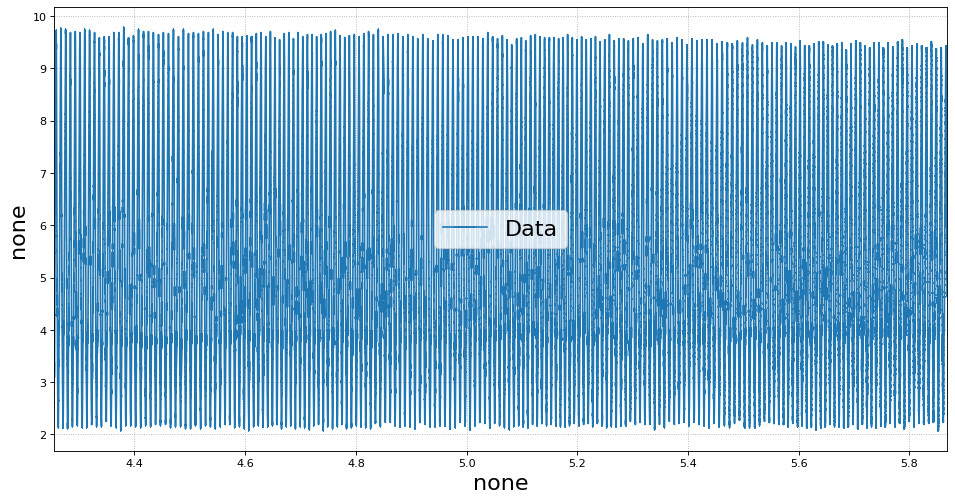

In [4]:
f.figsize(2)
plt.errorbar(data[0],data[1],xerr=data[2],label = 'Data')

f.form([4.255,5.868])
#f.form([4.4,5])

[[Model]]
    Model(sine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 72
    # data points      = 6000
    # variables        = 3
    chi-square         = 2016161.41
    reduced chi-square = 336.194998
    Akaike info crit   = 34909.1473
    Bayesian info crit = 34929.2459
    R-squared          = -52.8766258
[[Variables]]
    amplitude:  2.45352302 +/- 0.03350817 (1.37%) (init = 2.241894)
    frequency:  692.416893 +/- 0.15710771 (0.02%) (init = 691.1178)
    shift:     -6.28319526 +/- 0.88784892 (14.13%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(frequency, shift) = 1.000
0.0005437589675709384
735.620052


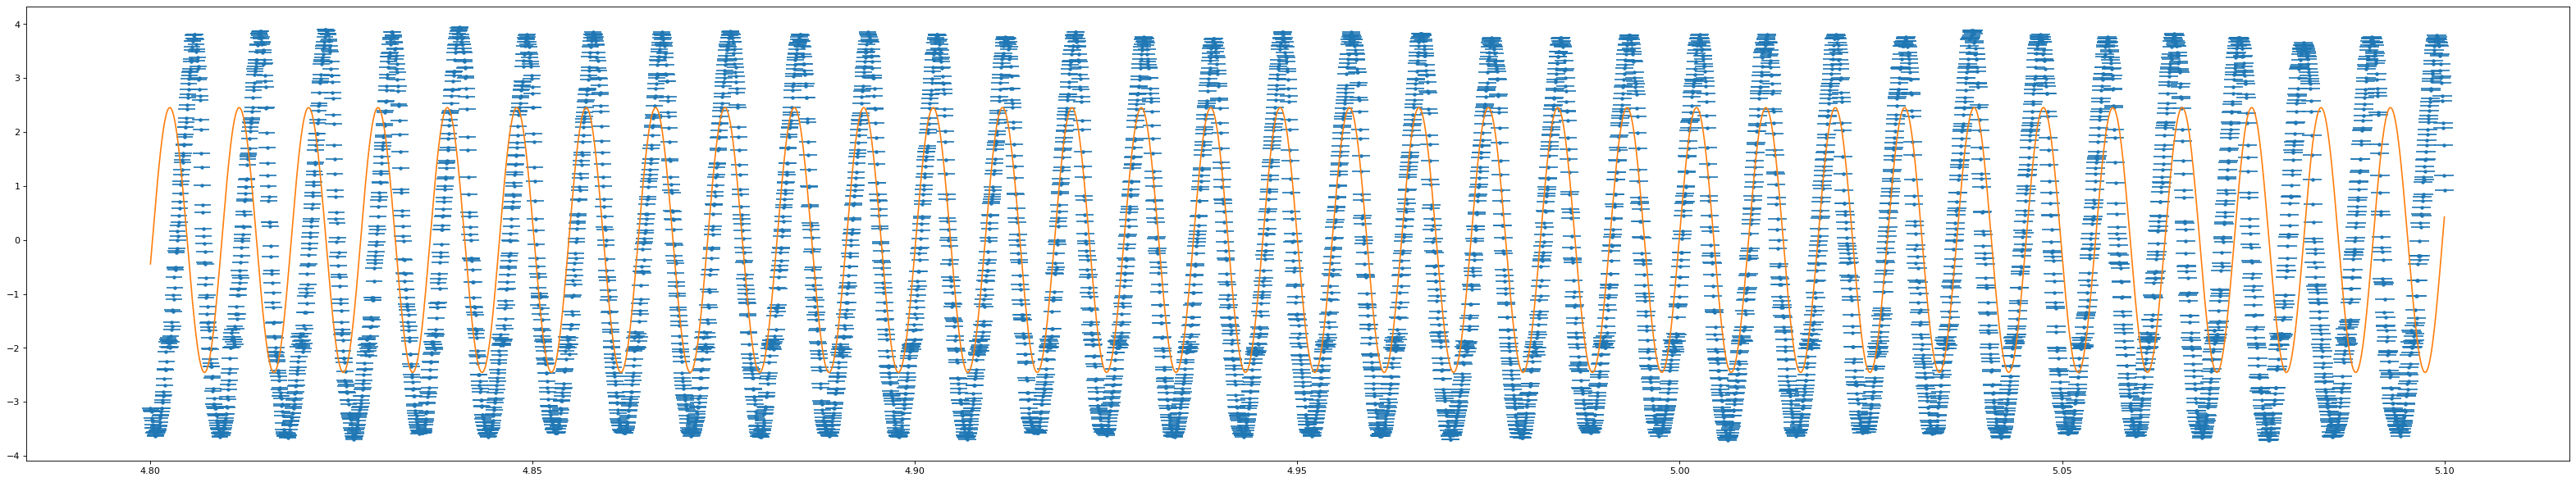

In [5]:
von , bis = f.pos(data[0],4.8),f.pos(data[0],5.1)
fig = plt.figure(figsize=(50,9),dpi=80,linewidth=70)

datanew = [[],[]]
datanew[1] = data[1]-5.8
fillerr = np.full(len(datanew[1][von:bis]),0.1)
res = f.sinfit(datanew[1][von:bis],data[0][von:bis],fillerr)

plt.errorbar(data[0][von:bis],datanew[1][von:bis],xerr=data[2][von:bis],fmt='.',label = 'Data',zorder=5)
plt.plot(data[0][von:bis],res.eval(x=data[0][von:bis]),zorder=10)

print(res.fit_report())






#plt.vlines(data[0][100],0,100)
#plt.vlines(data[0][100+735],0,100)
freq = 735.620052# *cal[0]+cal[2]

print(1/5*2/freq)
print(freq)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 2000
    # variables        = 4
    chi-square         = 71827.9127
    reduced chi-square = 35.9859282
    Akaike info crit   = 7170.25195
    Bayesian info crit = 7192.65556
    R-squared          = -4.78826771
[[Variables]]
    a:  3.42319737 +/- 0.01899273 (0.55%) (init = 4)
    b:  747.513109 +/- 0.19161346 (0.03%) (init = 705)
    c: -203.323472 +/- 0.89091829 (0.44%) (init = -6)
    d:  5.42121526 +/- 0.01343169 (0.25%) (init = 6)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -1.000


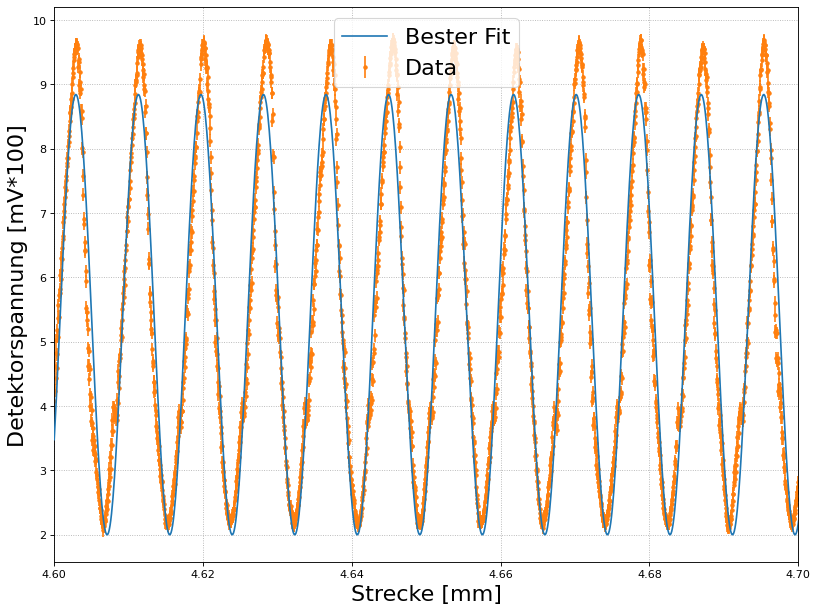

160.42124446542647
747.513109


In [7]:
von , bis = f.pos(data[0],4.6),f.pos(data[0],4.7)
fillerr = np.full(len(data[1][von:bis]),0.1)


def sin(x,a,b,c,d):
    return a*np.sin(b*x+c)+d


model_func = lmfit.model.Model(sin)  

#parameter erstellen
pars_func = model_func.make_params()



pars_func["a"].set(value=4)#,min=0.01,max=1)
pars_func["b"].set(value=705)#,min=0.01,max=1)
pars_func["c"].set(value=-6)#,min=0.01,max=1)
pars_func["d"].set(value=6)#,min=0.01,max=1)
#Fitten
res = model_func.fit(data[1][von:bis],x=data[0][von:bis],params=pars_func,weights=1/fillerr,nan_policy='propagate')
print(res.fit_report())


f.figsize(1)
plt.plot(np.arange(4.2,5.8,0.0001),res.eval(x=np.arange(4.2,5.8,0.0001)),zorder = 10,label='Bester Fit')
plt.errorbar(data[0][von:bis],data[1][von:bis],yerr = fillerr,fmt='.',label = 'Data')
f.form([4.6,4.7],xlabel='Strecke [mm]',ylabel='Detektorspannung [mV*100]',name='Res/A3_sinfit.pdf')





freq = 747.513109# *cal[0]+cal[2]

print(const.c*1e-3/5*2/freq)
print(freq)